Classifying Pulsar Stars

In [1]:
set.seed(2001)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Preliminary exploratory data analysis

In [2]:
#reading the pulsar dataset directly from web
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

temp <- tempfile()
download.file(url,temp)
pulsar_data <- read_csv(unz(temp, "HTRU_2.csv"))
unlink(temp)

pulsar_data

Parsed with column specification:
cols(
  `140.5625` = col_double(),
  `55.68378214` = col_double(),
  `-0.234571412` = col_double(),
  `-0.699648398` = col_double(),
  `3.199832776` = col_double(),
  `19.11042633` = col_double(),
  `7.975531794` = col_double(),
  `74.24222492` = col_double(),
  `0` = col_double()
)



140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0
107.25781,39.49649,0.465881961,1.16287712,4.0794314,24.980418,7.397080,57.78474,0


In [3]:
#added column names
colnames(pulsar_data) <- c("mean_pf", "std_pf", "kurt_pf", "skew_pf", "mean_dm", "std_dm", "kurt_dm", "skew_dm", "class")

pulsar_unscaled <- pulsar_data %>%
                mutate(class = as_factor(class))
pulsar_unscaled

mean_pf,std_pf,kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0
107.25781,39.49649,0.465881961,1.16287712,4.0794314,24.980418,7.397080,57.78474,0


Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

$title
[1] "kurt_pf vs skew_dm"

attr(,"class")
[1] "labels"

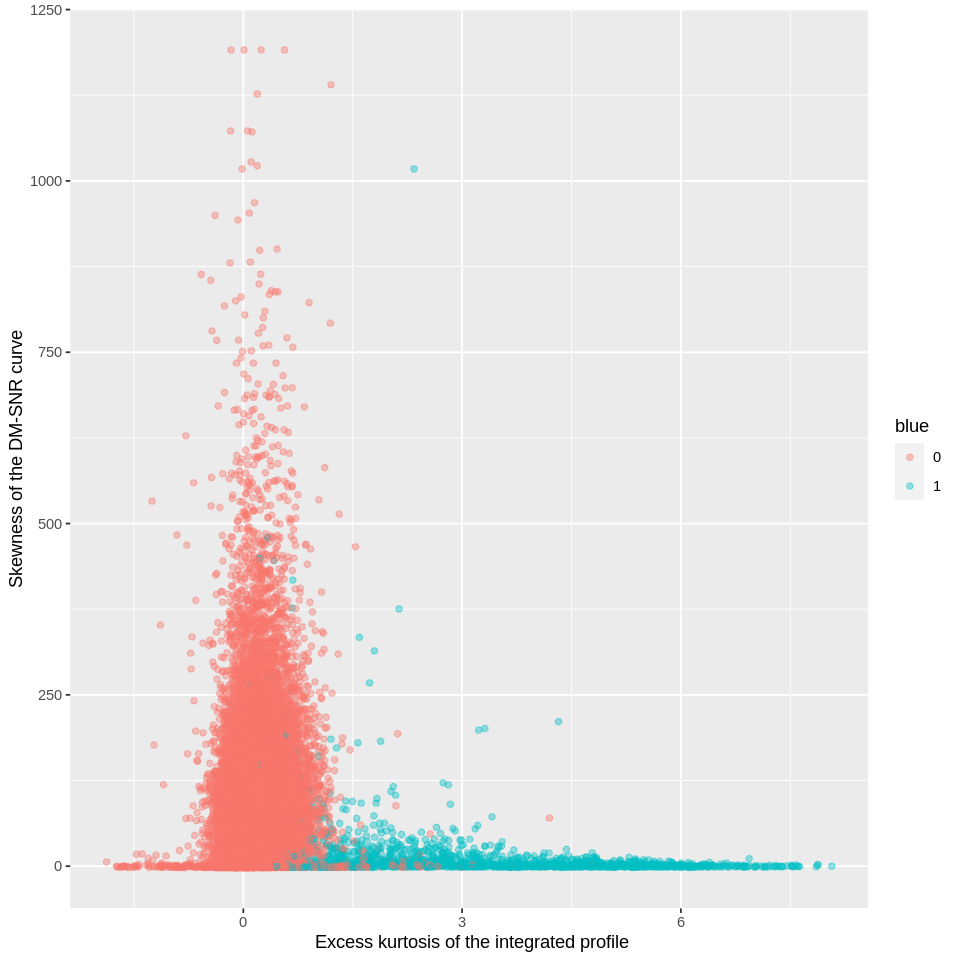

In [11]:
options(repr.plot.width = 8, repr.plot.height = 8) 
pulsars_plot1 <- pulsar_unscaled %>%
    ggplot(aes(x = kurt_pf, y = skew_dm)) + 
        geom_point((aes(colour = class)), alpha = 0.4) + 
        labs(x = " Excess kurtosis of the integrated profile", y = "Skewness of the DM-SNR curve", colour = "blue")
        theme(text = element_text(size=20))
        ggtitle("kurt_pf vs skew_dm")
pulsars_plot1

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

$title
[1] "kurt_pf vs skew_pf"

attr(,"class")
[1] "labels"

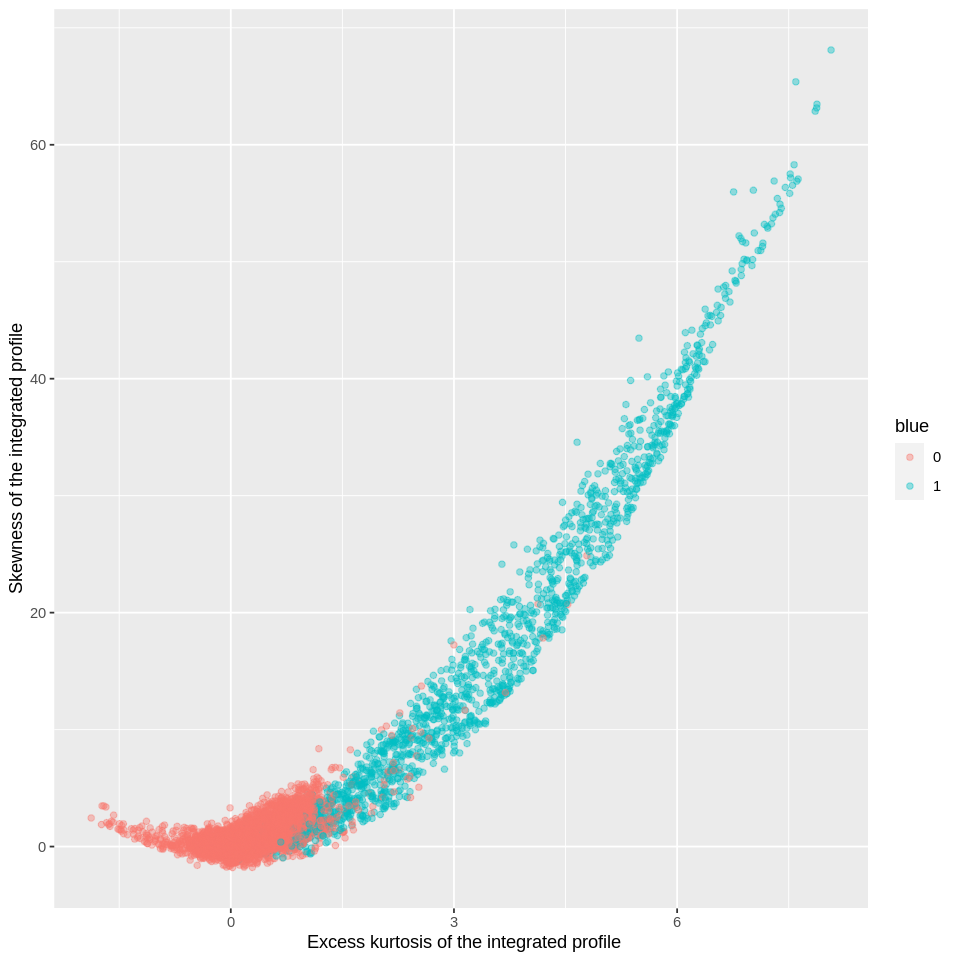

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8) 
pulsars_plot2 <- pulsar_unscaled %>%
    ggplot(aes(x = kurt_pf, y = skew_pf)) + 
        geom_point((aes(colour = class)), alpha = 0.4) + 
        labs(x = " Excess kurtosis of the integrated profile", y = "Skewness of the integrated profile", colour = "blue")
        theme(text = element_text(size=20))
        ggtitle("kurt_pf vs skew_pf")
pulsars_plot2

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

$title
[1] "kurt_pf vs mean_dm"

attr(,"class")
[1] "labels"

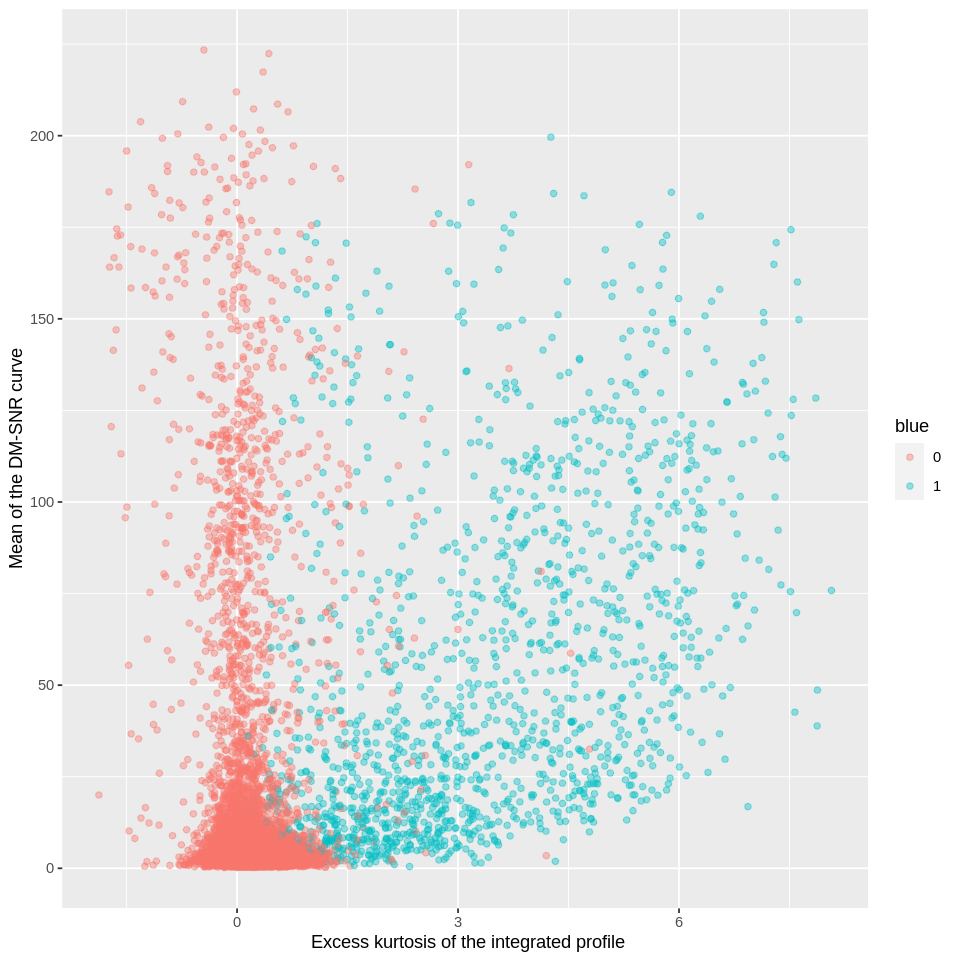

In [14]:
options(repr.plot.width = 8, repr.plot.height = 8) 
pulsars_plot3 <- pulsar_unscaled %>%
    ggplot(aes(x = kurt_pf, y = mean_dm)) + 
        geom_point((aes(colour = class)), alpha = 0.4) + 
        labs(x = " Excess kurtosis of the integrated profile", y = "Mean of the DM-SNR curve", colour = "blue")
        theme(text = element_text(size=20))
        ggtitle("kurt_pf vs mean_dm")
pulsars_plot3

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

$title
[1] "mean_dm vs skew_pf"

attr(,"class")
[1] "labels"

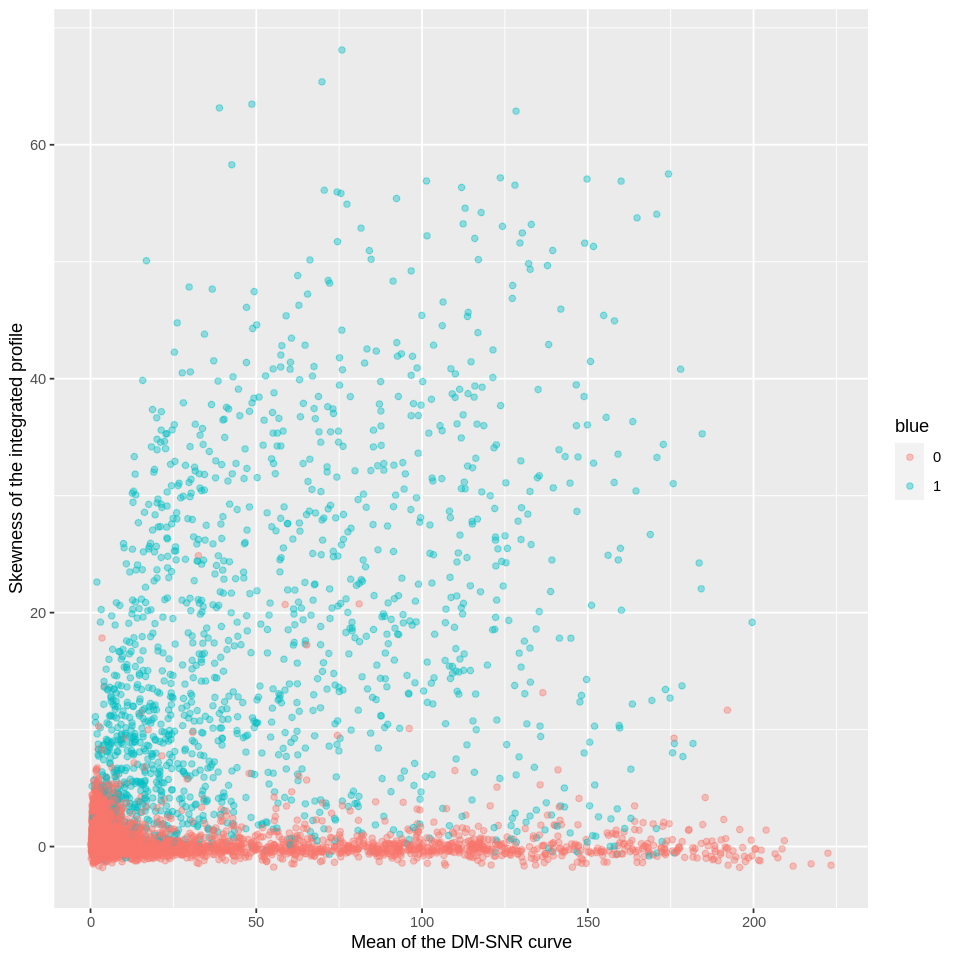

In [15]:
options(repr.plot.width = 8, repr.plot.height = 8) 
pulsars_plot4 <- pulsar_unscaled %>%
    ggplot(aes(x = mean_dm, y = skew_pf)) + 
        geom_point((aes(colour = class)), alpha = 0.4) + 
        labs(x = "Mean of the DM-SNR curve", y = "Skewness of the integrated profile", colour = "blue")
        theme(text = element_text(size=20))
        ggtitle("mean_dm vs skew_pf")
pulsars_plot4

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

$title
[1] "skew_dm vs skew_pf"

attr(,"class")
[1] "labels"

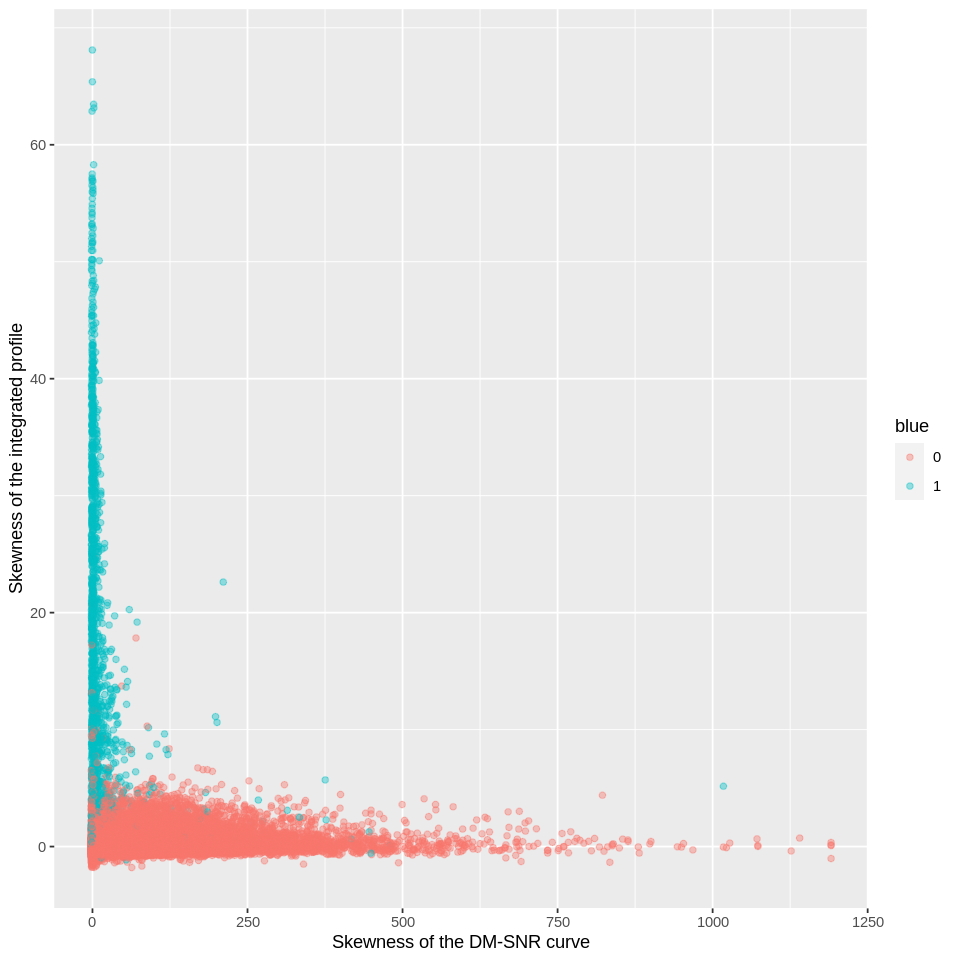

In [17]:
options(repr.plot.width = 8, repr.plot.height = 8) 
pulsars_plot5 <- pulsar_unscaled %>%
    ggplot(aes(x = skew_dm, y = skew_pf)) + 
        geom_point((aes(colour = class)), alpha = 0.4) + 
        labs(x = "Skewness of the DM-SNR curve", y = "Skewness of the integrated profile", colour = "blue")
        theme(text = element_text(size=20))
        ggtitle("skew_dm vs skew_pf")
pulsars_plot5

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

$title
[1] "mean_dm vs skew_dm"

attr(,"class")
[1] "labels"

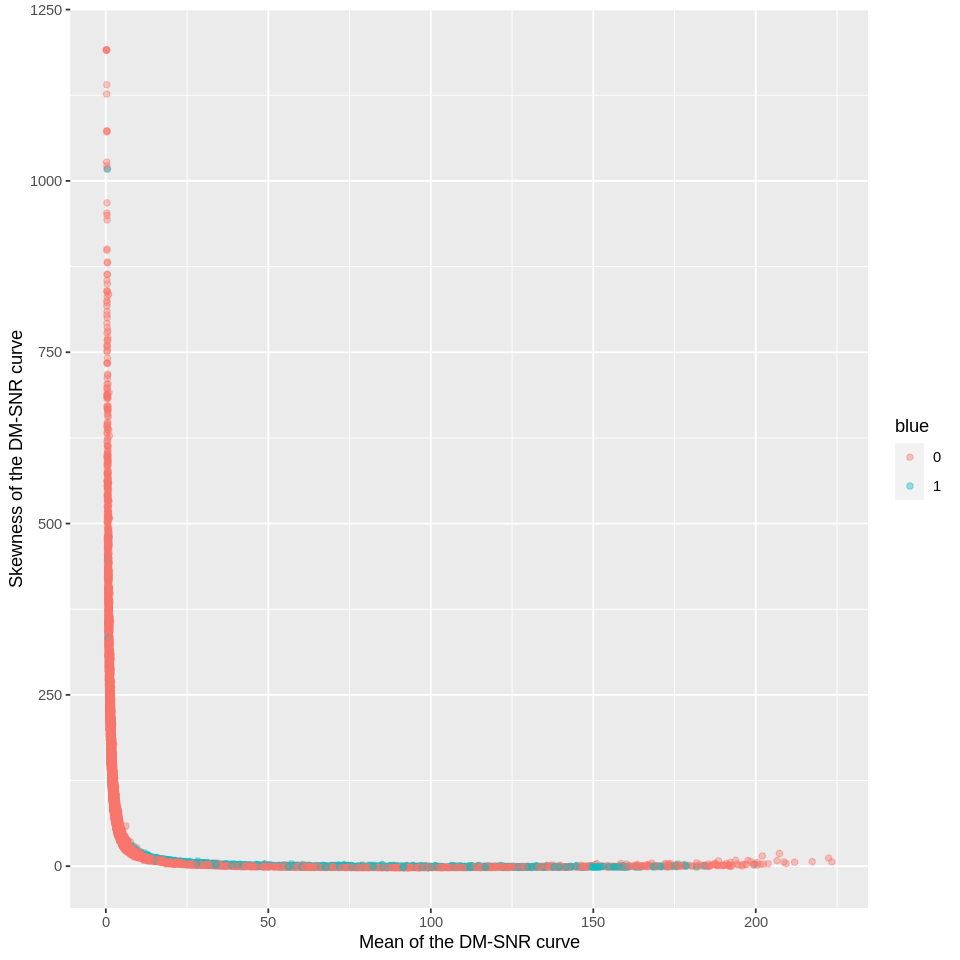

In [18]:
options(repr.plot.width = 8, repr.plot.height = 8) 
pulsars_plot6 <- pulsar_unscaled %>%
    ggplot(aes(x = mean_dm, y = skew_dm)) + 
        geom_point((aes(colour = class)), alpha = 0.4) + 
        labs(x = "Mean of the DM-SNR curve", y = "Skewness of the DM-SNR curve", colour = "blue")
        theme(text = element_text(size=20))
        ggtitle("mean_dm vs skew_dm")
pulsars_plot6

In [20]:
pulsar_select <- pulsar_unscaled %>%
                 select(kurt_pf, skew_pf, mean_dm, skew_dm, class)
pulsar_select

kurt_pf,skew_pf,mean_dm,skew_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.465318154,-0.51508791,1.6772575,127.39358,0
0.323328365,1.05116443,3.1212375,63.17191,0
-0.068414638,-0.63623837,3.6429766,53.59366,0
0.600866079,1.12349169,1.1789298,252.56731,0
0.531904850,0.41672112,1.6362876,131.39400,0
0.031460220,-0.11216757,0.9991639,479.75657,0
-0.158322759,0.38954045,1.2207358,198.23646,0
0.452688025,0.17034738,2.3319398,107.97251,0
0.465881961,1.16287712,4.0794314,57.78474,0


In [6]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# creating the centering / scaling recipe
unscaled_recipe <- recipe(class ~ ., data = pulsar_select) %>%
            step_scale(all_predictors()) %>%
            step_center(all_predictors()) 
unscaled_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          8

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [7]:
pulsar_split <- initial_split(pulsar_select, prop = 0.75, strata = class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

# checking if data corresponds to a train / test split of 75% / 25%, as desired
glimpse(pulsar_train)
glimpse(pulsar_test)

Rows: 13,423
Columns: 9
$ mean_pf <dbl> 103.01562, 136.75000, 88.72656, 119.48438, 130.38281, 107.250…
$ std_pf  <dbl> 39.34165, 57.17845, 40.67223, 48.76506, 39.84406, 52.62708, 3…
$ kurt_pf <dbl> 0.32332837, -0.06841464, 0.60086608, 0.03146022, -0.15832276,…
$ skew_pf <dbl> 1.05116443, -0.63623837, 1.12349169, -0.11216757, 0.38954045,…
$ mean_dm <dbl> 3.1212375, 3.6429766, 1.1789298, 0.9991639, 1.2207358, 2.3319…
$ std_dm  <dbl> 21.744669, 20.959280, 11.468720, 9.279612, 14.378941, 14.4868…
$ kurt_dm <dbl> 7.735822, 6.896499, 14.269573, 19.206230, 13.539456, 9.001004…
$ skew_dm <dbl> 63.17191, 53.59366, 252.56731, 479.75657, 198.23646, 107.9725…
$ class   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 4,474
Columns: 9
$ mean_pf <dbl> 102.50781, 93.57031, 114.36719, 100.85156, 136.09375, 99.3671…
$ std_pf  <dbl> 58.88243, 46.69811, 51.94572, 51.74352, 51.69100, 41.57220, 4…
$ kurt_pf <dbl> 0.465318154, 0.531904850, -0.094498904, 0.393836792, -0.04590…
$ ske

In [8]:
pulsar_proportions <- pulsar_train %>%
                      group_by(class) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_train))

pulsar_proportions

`summarise()` ungrouping output (override with `.groups` argument)



class,n,percent
<fct>,<int>,<dbl>
0,12187,90.791924
1,1236,9.208076


In [9]:
# Preprocessing data
# Performing cross validation
pulsar_vfold <- vfold_cv(pulsar_train, v = 5, strata = class)

# Creating KNN model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

# Creating recipe using training data
pulsar_recipe <- recipe(class ~ ., data = pulsar_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

In [10]:
# fitting the knn model (we can reuse the old knn_spec model from before)
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results <- workflow() %>%
  add_recipe(pulsar_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = pulsar_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9719139,5,0.0010102579,Model01
2,accuracy,binary,0.9719139,5,0.0010102579,Model02
3,accuracy,binary,0.9776502,5,0.0010067840,Model03
4,accuracy,binary,0.9776502,5,0.0010067840,Model04
5,accuracy,binary,0.9772032,5,0.0010100309,Model05
6,accuracy,binary,0.9772032,5,0.0010100309,Model06
7,accuracy,binary,0.9777247,5,0.0012210526,Model07
8,accuracy,binary,0.9777247,5,0.0012210526,Model08
9,accuracy,binary,0.9772776,5,0.0009507807,Model09
